# Проект
### Шипицына Алина, 716 группа

## Постановка задачи

В данной работе я хочу решить численно уравнение переноса с периодическими граничными условиями,$$u_t + u_x = 0$$ $$u(x, 0) = sin(\frac{4 \pi x}{L}, 0 \leq x \leq L) $$ используя различные способы и сравню результаты с аналитическим решением. Также я проведу исследование схемы на сходимость и покажу, что при сгущении сетки точность схем увеличивается

Я рассмотрю 4 разностные схемы:
- схему с разностями против потока
- схему Лакса-Ведроффа
- схему Лакса
- схему с разностями по потоку


Сетка равномерная: $$ x_i = (1-i)h, i = 1,...,NX, h = \frac{L}{NX - 1} $$ $$ x_1 = 0, x_{NX} = L$$

B качестве входных параметров буду использовать числа Куранта $CFL$, а также размер области $L = 20$ (переменные в этой задаче безразмерные), время расчета $T = 18$.. Расчеты проведу для следующих значений $CFL: 0.25; 0.5; 1; 1.3$



#### Примерная схема реализации программы имеет вид:
1. Задание начальных данных.
2. Генерация сетки.
3. Цикл по времени, в котором:

    а) проводится расчет $y_i^{n+1}$ для $i = 2, ..., NX$ в соответствии с используемым численным методом;
    
    б) рассчитывается значение $y_1^{n+1}$ (учет граничных условий);
    
    в) инкрементирование времени $t += \tau$;
 


## Исследование на сходисмость 
Условия устойчивости: 
- Левый уголок - всегда для нашей схемы
- Правый уголок - никогда для нашей схемы
- Лакса-Ведроффа - $CFL \leq 1$
- Лакса - $CFL \leq 1$


### Задание парамаетров

In [599]:
%matplotlib inline
import matplotlib.pyplot as plt
from math import *
import numpy as np

##### Здесь можно менять число Куранта

In [600]:
CFL = 0.6 #(число Куранта)

In [601]:
a=1 ##из ур-я
L = 20 ## размер области
h = 0.5 ## шаг по простр.перем.
T = 18 ## расчетное время

t = CFL*h
N_t =int(T/t) ##кол-во узлов по времени-1
t = T/N_t ##шаг по времени
print("Шаг по времени %f, количество узлов по времени: %d"% (t, N_t))

Шаг по времени 0.300000, количество узлов по времени: 60


In [602]:
x, y_0, u_0, w_0, v_0= [], [], [], [], [] ## u-уголок; y-Лакса-Вендрофа; w-уголок в лругую сторону; v-лакс
y, u, w, v = [[]], [[]], [[]], [[]]

### Задание граничных условий

In [603]:
for i in range (int(L/h+1)) :
    x.append((i)*h)
    y_0.append(sin(4*pi*x[i]/L)) ## y(x,0)- начальное условие


In [604]:
y[0] = y_0
u[0] = y_0
w[0] = y_0
v[0] = y_0

## Аналитическое решение уравнения

Будем проводить измереение при времени $T_0 = 10$

Аналитическим решение уравнения является:
$$y_{teor} = sin(4\pi \frac{x-t}{L}), t = T_0$$

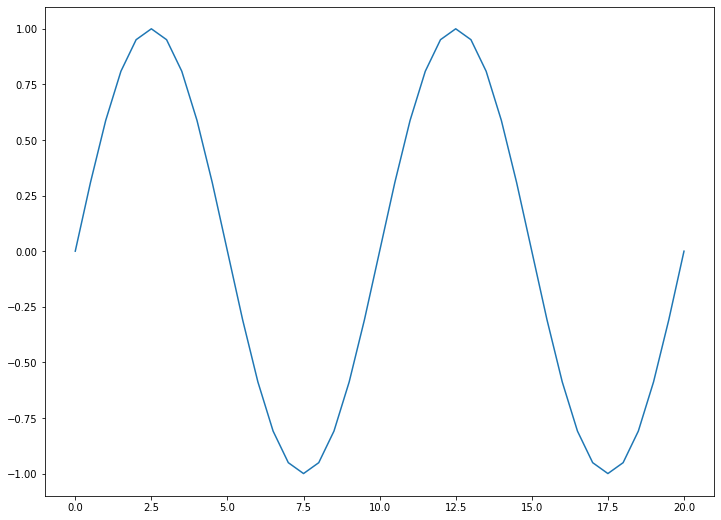

In [605]:
T0 = 10
y_teor = [] #аналитическое решение в момент T0
for i in range (int(L/h+1)):
    y_teor.append(sin(4*pi*(x[i]-T0)/L))
    
fig, ax = plt.subplots(figsize=(12, 9))
ax.plot(x, y_teor)

## Реализация схемы с разностями против потока (уголок(.:))

$$\frac{y_m^{n+1} - y_m^n}{\tau} + \frac{y_m^n - y_{m-1}^n}{h} = 0 $$

In [606]:
for n in range (N_t):
    u.append([])
    u[n+1].append(0)
    for i in range(int(L/h)):
        u[n+1].append(u[n][i+1] - CFL*(u[n][i+1] - u[n][i]))
    u[n+1][0] = u[n+1][int(L/h)]

Покажем на графике эволюцию получившегося по схеме решения во во времени

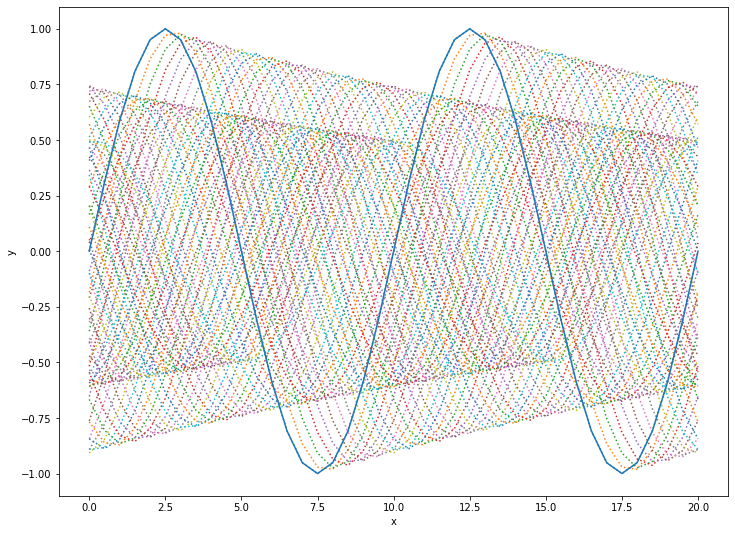

In [607]:
fig, ax = plt.subplots(figsize=(12, 9))
ax.set_xlabel('x')
ax.set_ylabel('y')
for i in range(N_t):
    ax.plot(x, u[i], linestyle=':')
ax.plot(x, y_0, linestyle='-') 
plt.show()

## Реализация схемы с разностями по потоку (уголок(:.))

$$\frac{y_m^{n+1} - y_m^n}{\tau} + \frac{y_{m+1}^n - y_m^n}{h} = 0 $$

In [608]:
for n in range (N_t):
    w.append([])
    for i in range(int(L/h)):
        w[n+1].append(w[n][i] - CFL*(w[n][i+1] - w[n][i]))
    w[n+1].append(w[n+1][0])

Покажем на графике эволюцию получившегося по схеме решения во во времени

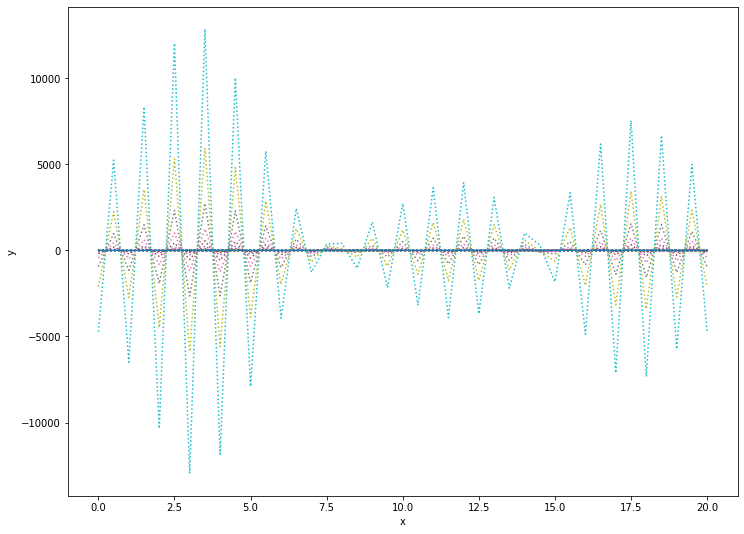

In [609]:
fig, ax = plt.subplots(figsize=(12, 9))
ax.set_xlabel('x')
ax.set_ylabel('y')
for i in range(N_t):
    ax.plot(x, w[i], linestyle=':')
ax.plot(x, y_0, linestyle='-') 
plt.show()

Уже даже сейчас видно, что схема по потоку работает очень плохо, ведь амплитуда сильно варьируется, а аналитическим решением является синусоида, а ее амплитуда постоянна и равна единице. Данный результат кажется вполне логичным.

## Реализация схемы Лакса-Вендроффа

$$ \frac{y_m^{n+1} - y_m^n}{\tau} + a\frac{y_{m+1}^n - y_{m-1}^n}{2h} - \frac{a^2\tau}{2} \frac{y_{m+1}^n - 2y_m^n + y_{m-1}^n}{h^2} = 0 $$

In [610]:
for n in range (N_t):
    y.append([])
    y[n+1].append(33) #заняли место под 0 элемент, положили число любое
    # теперь в цикле заполняем с 1 по 39 элемент включительно
    for i in range(int(L/h)-1):
        y[n+1].append(y[n][i+1] - CFL/2*(y[n][i+2] - y[n][i]) + CFL**2/2*(y[n][i+2] - 2*y[n][i+1] + y[n][i]))
    #считаем 40 элемент, вместо фиктивной точки сразу подставляю y[n][1]
    y[n+1].append(y[n][40] - a*CFL/2*(y[n][1] - y[n][39]) + a**2*CFL**2/2*(y[n][1] - 2*y[n][40] + y[n][39])) 
    # присваеваем теперь 0 элементу значение 40, замыкаем кольцо
    y[n + 1][0] = y[n+1][40]

Покажем на графике эволюцию получившегося по схеме решения во во времени

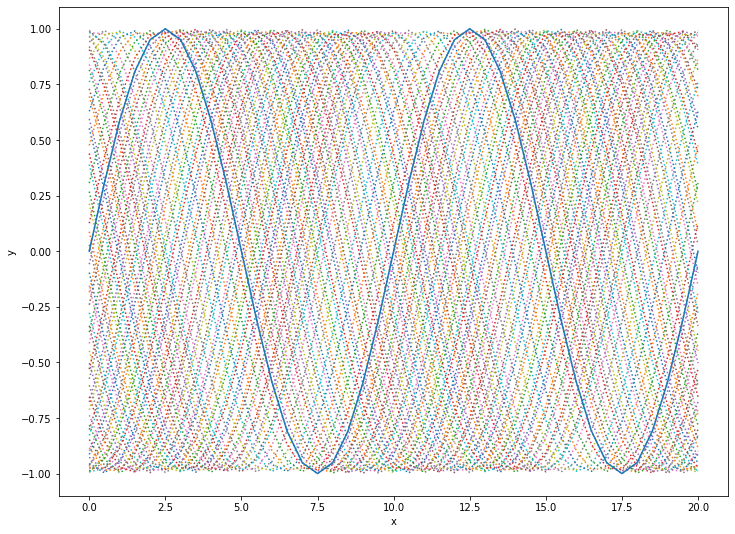

In [611]:
fig, ax = plt.subplots(figsize=(12, 9))
ax.set_xlabel('x')
ax.set_ylabel('y')
for i in range(N_t):
    ax.plot(x, y[i], linestyle=':')
ax.plot(x, y_0, linestyle='-') 
plt.show()

## Реализация схемы Лакса

$$\frac{y_m^{n+1} - 0.5(y_{m+1}^n + y_{m-1}^n)}{\tau} + a\frac{y_{m+1}^n - y_{m-1}^n}{2h} = 0 $$

In [612]:
for n in range (N_t):
    v.append([])
    v[n+1].append(33)
    for i in range(int(L/h)-1):
        v[n+1].append(0.5*(v[n][i+2] +v[n][i]) - a*CFL/2*(v[n][i+2] - v[n][i]))
    v[n+1].append(0.5*(v[n][40] +v[n][39]) - a*CFL/2*(v[n][40] - v[n][39]))
    v[n+1][0] = v[n+1][40]

Покажем на графике эволюцию получившегося по схеме решения во во времени

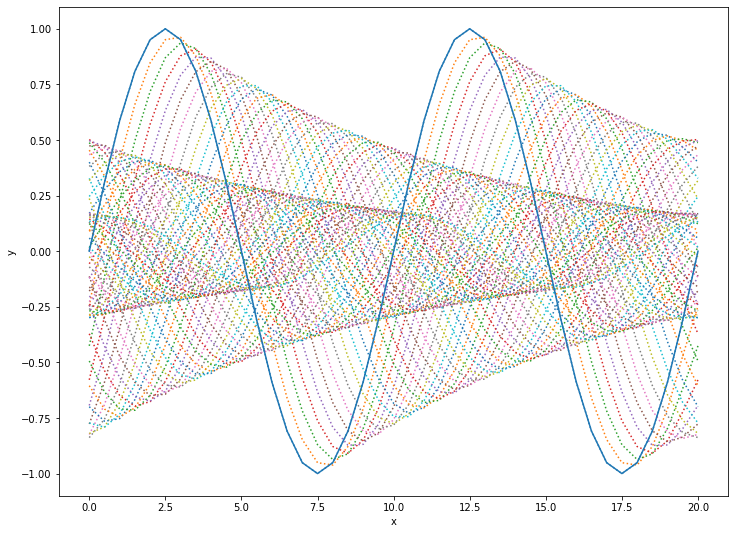

In [613]:
fig, ax = plt.subplots(figsize=(12, 9))
ax.set_xlabel('x')
ax.set_ylabel('y')
for i in range(N_t):
    ax.plot(x, v[i], linestyle=':')
ax.plot(x, y_0, linestyle='-') 
plt.show()

## Анализ результатов 
Сравним результаты, полученные на разных схемах с аналитическим решением

### Для начала рассмотрим совпадение графиков
Рассмотрим совпадение аналитического решения в момент времени Т0 с решением полученным по разным схемам. Если Т0 не является узлом сетки, то берем ближайний к нему узел и выводим результат схемы на данном слое

Найдем ближайший узел к времени Т0 и обозначим его $l$

In [614]:
delta_t = 1000
l = 0
for n in range(N_t):
    if (np.abs(T0 - n*t) <= delta_t):
        delta_t = np.abs(T0 - n*t)
        l = n

### CFL = 0.6

#### Cхема с разностями против потока (уголок(.:))
Пунктирной линией изображено аналитическое решение, точками - полученное по схеме с разностями против потока

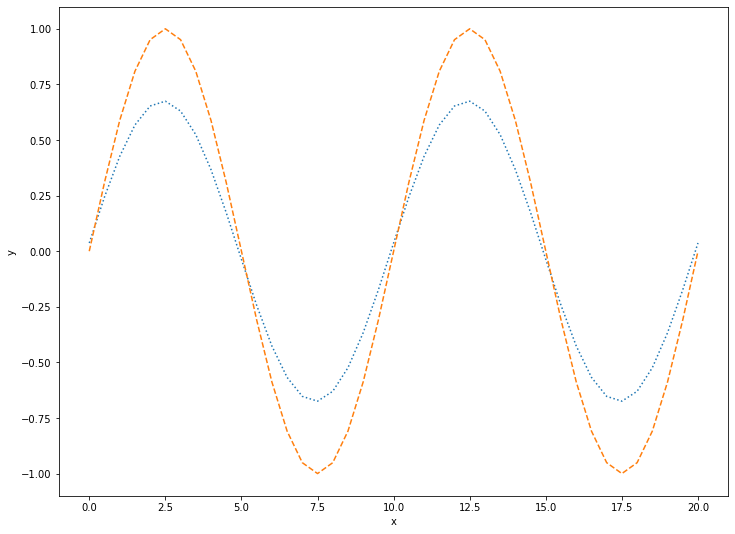

In [615]:
fig, ax = plt.subplots(figsize=(12, 9))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.plot(x, u[l], linestyle=':')
ax.plot(x, y_teor, linestyle='--')

In [616]:
print("Error:", np.abs(u[l][15]-y_teor[15]))

Error: 0.32547594570401084


#### Схема с разностями по потоку (уголок(:.))
Пунктирной линией изображено аналитическое решение, точками - полученное по схеме с разностями по потоку

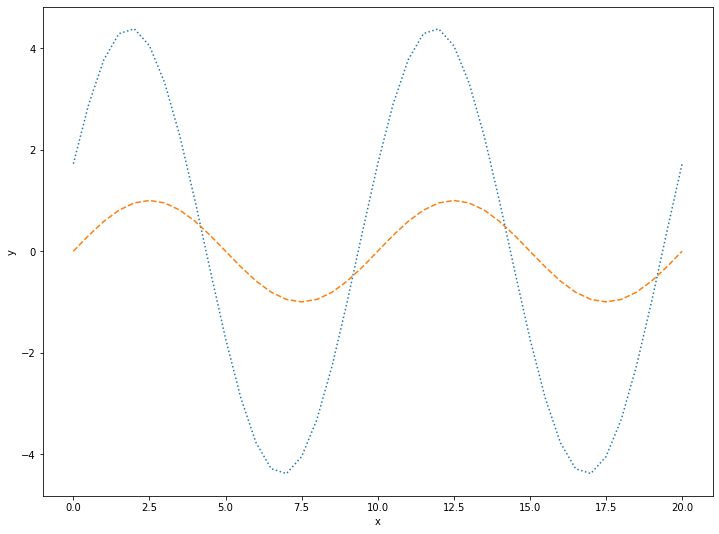

In [617]:
fig, ax = plt.subplots(figsize=(12, 9))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.plot(x, w[l], linestyle=':')
ax.plot(x, y_teor, linestyle='--')

In [618]:
print("Error:", np.abs(w[l][15] - y_teor[15]))

Error: 3.0501352375739463


#### Схема Лакса-Ведроффа
Пунктирной линией изображено аналитическое решение, точками - полученное по схеме Лакса-Ведроффа

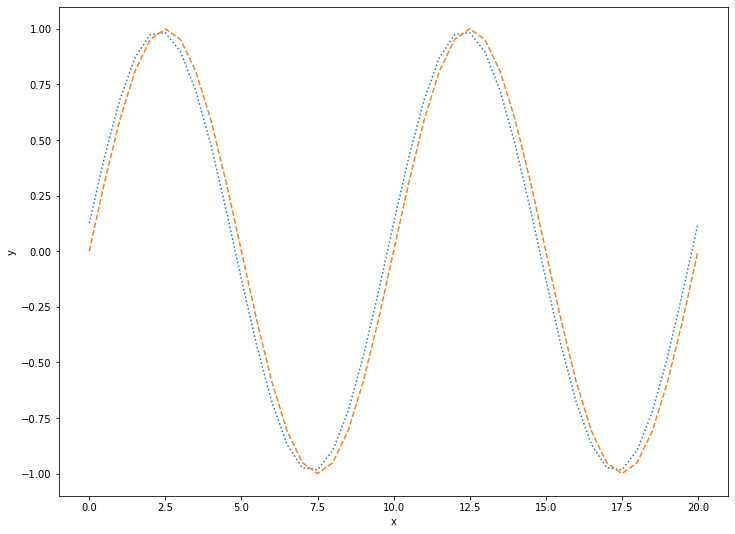

In [619]:
fig, ax = plt.subplots(figsize=(12, 9))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.plot(x, y[l], linestyle=':')
ax.plot(x, y_teor, linestyle='--')

In [620]:
print("Error:", np.abs(y[l][15] - y_teor[15]))

Error: 0.017088612385343094


#### Схема Лакса
Пунктирной линией изображено аналитическое решение, точками - полученное по схеме Лакса

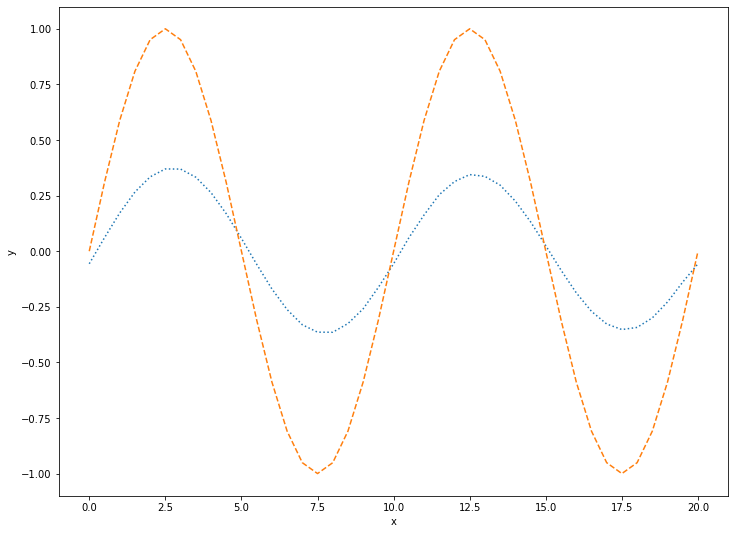

In [621]:
fig, ax = plt.subplots(figsize=(12, 9))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.plot(x, v[l], linestyle=':')
ax.plot(x, y_teor, linestyle='--')

In [622]:
print("Error:", np.abs(v[l][15] - y_teor[15]))

Error: 0.6357764820107314


### Меняя число Куранта в пределах [0.25, 0.5, 1, 1.3], можно увидеть, как при сгущении сетки (а значит при увеличении числа Куранта) точность возрастает. Однако это происходит только при выполнении условия сходимости схемы
В прикрепленном пдф-файле показан анализ полученных результатов